In [1]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
from skimage.transform import resize
from math import ceil
import skimage
import numpy as np

In [7]:
def compound(img):
    img = img_as_float(img)    
    size = img.shape[0] // 3    
    blue = img[0:size, ::].copy()    
    horizontal = ceil(blue.shape[0] * (1 - 0.9))
    width = ceil(blue.shape[1] * (1 - 0.9))
    blue = blue[horizontal:blue.shape[0] - horizontal, width:blue.shape[1] - width]
    
    red = img[size:size*2, ::].copy()
    horizontal = ceil(red.shape[0] * (1 - 0.9))
    width = ceil(red.shape[1] * (1 - 0.9))
    red = red[horizontal:red.shape[0] - horizontal, width:red.shape[1] - width]
    
    
    green = img[size*2:size*3, ::].copy()
    horizontal = ceil(green.shape[0] * (1 - 0.9))
    width = ceil(green.shape[1] * (1 - 0.9))
    green = green[horizontal:green.shape[0] - horizontal, width:green.shape[1] - width]
    
    max_blue_corr = -1
    max_red_corr = -1
       
    x_b = -80
    y_b = -80    
    x_r = -80
    y_r = -80
    
    x = np.arange(-80, 80)
    y = np.arange(-80, 80)
    
    for i in x:
        for j in y:
            temp_blue = blue.copy()
            temp_blue = np.roll(temp_blue, i, axis = 0)
            temp_blue = np.roll(temp_blue, j, axis = 1)
            corr = (temp_blue * green).sum()
            if corr > max_blue_corr:
                max_blue_corr = corr
                x_b = i
                y_b = j
              
            temp_red = red.copy()
            temp_red = np.roll(temp_red, i, axis = 0)
            temp_red = np.roll(temp_red, j, axis = 1)
            corr = (temp_red * green).sum()
            if corr > max_red_corr:
                max_red_corr = corr
                x_r = i
                y_r = j
    
    red = np.roll(red, x_r, axis = 0)
    red = np.roll(red, y_r, axis = 1)
    
    blue = np.roll(blue, x_b, axis = 0)
    blue = np.roll(blue, y_b, axis = 1)
    
    mod_img = np.dstack((green, red, blue))
    return mod_img

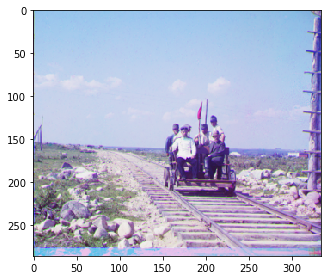

In [8]:
img = imread('gathering_of_teches.png')
color_img = compound(img)
imshow(color_img)

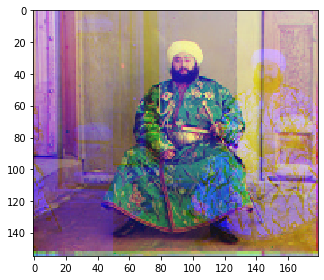

In [9]:
img = imread('sultanishe.jpg')
color_img = compound(img)
imshow(color_img)